In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import aplpy
from astropy.modeling import models, fitting
from astropy import wcs
import wcsaxes
%matplotlib inline

#import ROOT
from header_utils import verify_header
import aplpy.regions
import pyregion
#from astropy import pyregion


In [8]:
filename = "./stage6_wobble_disp5t_skymap_subtraction_center_SgrA_maps.fits"
update_file = fits.open(filename, mode='update')
#update_header = fits.getheader(filename)
data_up, update_header = fits.getdata(filename,header=True)
print(type(update_header))
print(update_header)
verify_header(update_header)
print(update_header)
update_file.close()
fits.writeto(filename, data_up, update_header, clobber=True)
#fits.getdata?

<class 'astropy.io.fits.header.Header'>
XTENSION= 'IMAGE   '           / IMAGE extension                                BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                  240 / length of data axis 1                          NAXIS2  =                  240 / length of data axis 2                          PCOUNT  =                    0 / required keyword; must = 0                     GCOUNT  =                    1 / required keyword; must = 1                     EXTNAME = 'sigMap  '           / Extension name                                 RADECSYS= 'FK5     '           / WCS for this file                              EQUINOX =                2000. / Epoch of coordinate system                     CTYPE1  = 'GLON-TAN'           / Axis type for dim 1 (GL)                       CRVAL1  =     359.944208708049 / Sky coord of 1st axis (deg)                    

In [136]:
data_fixed, header_fixed = fits.getdata("./release_galactic_skymap_fixed_head.fits", header=True)
print(header_fixed)
print(data_fixed)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  240                                                  NAXIS2  =                  240                                                  EXTNAME = 'ExcessSkyMap'       / Extension name                                 RADECSYS= 'FK5     '           / WCS for this file                              EQUINOX =                2000. / Epoch of coordinate system                     CTYPE1  = 'GLON-TAN'           / Axis type for dim 1 (GL)                       CRVAL1  =     359.944208708049 / Sky coord of 1st axis (deg)                    CRPIX1  =                 120. / Reference point of pixel location axis 1       CDELT1  =               -0.025 / X degrees per pixel                            CTYPE2  = 'GLAT-TAN'           / Axis ty

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.
/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


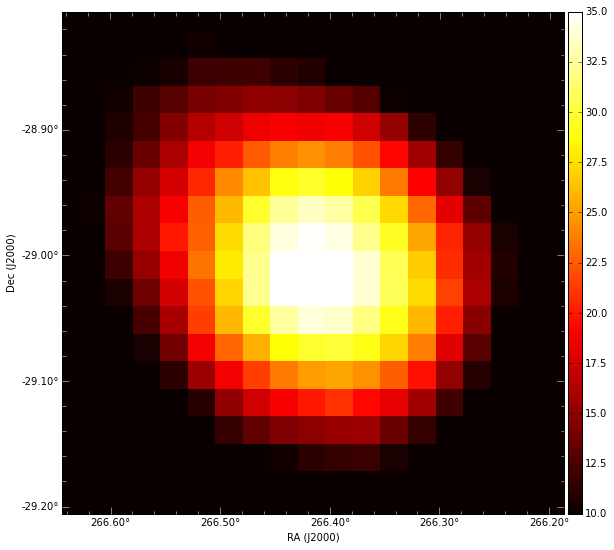

In [101]:
fig = aplpy.FITSFigure("/Users/mbuchove/Dropbox/GalacticCenter/python_notebooks/release_skymap.fits")
fig.show_colorscale(vmin=10, vmax=35, cmap='hot')
fig.show_colorbar()
fig.set_tick_labels_xformat('dd.dd')
fig.set_tick_labels_yformat('dd.dd')
#fig.recenter(0,0,width=1,height=1)
fig.recenter(266.415, -29.006, width=0.4, height=0.4)
#fig.show_circles(266.5, -29, 0.1)
#fig.add_label(266.5, -29, "test", color='white', fontsize='24')

In [65]:
wcs.WCS?

In [102]:
wcsGC = wcs.WCS("/Users/mbuchove/Dropbox/GalacticCenter/python_notebooks/release_galactic_skymap.fits")
data  = fits.getdata("/Users/mbuchove/Dropbox/GalacticCenter/python_notebooks/release_galactic_skymap.fits")
data[120,120]

1018.2681

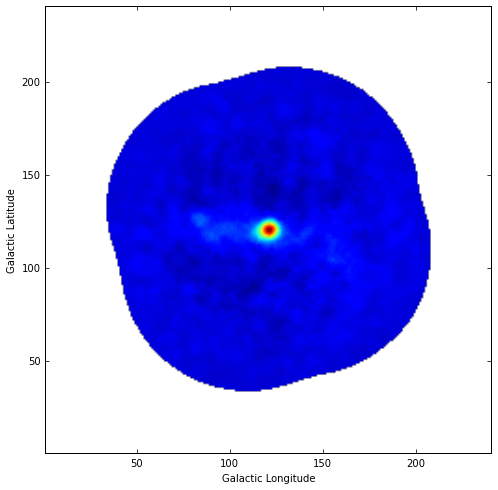

In [103]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection = wcsGC)
plt.imshow(data, origin='lower')
ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")
#ax.cla()
#ax.set_xlim(110,128)
#ax.set_ylim(112,127)
#fig.add_subplot?


In [100]:
HDUlist = fits.open("/Users/mbuchove/Dropbox/GalacticCenter/python_notebooks/release_skymap.fits")
HDUlist.info()

print(type(HDUlist))
print(type(HDUlist[2]))
hdu_2 = HDUlist[2]
excess_data_x = HDUlist[2].data
print(type(excess_data_x))
array1 = excess_data_x.copy()
print(array1)
print(array1[120,120])

Filename: /Users/mbuchove/Dropbox/GalacticCenter/python_notebooks/release_skymap.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      17   ()              
1    SignificanceSkyMap  ImageHDU        18   (274, 274)   float32   
2    ExcessSkyMap  ImageHDU        18   (274, 274)   float32   
<class 'astropy.io.fits.hdu.hdulist.HDUList'>
<class 'astropy.io.fits.hdu.image.ImageHDU'>
<class 'numpy.ndarray'>
[[ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 ..., 
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]]
10.8983


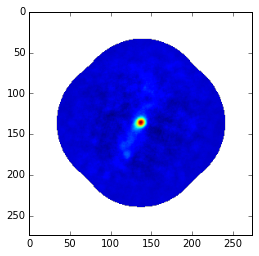

In [69]:
plt.imshow(excess_data)
#matplotlib.pyplot.colorbar()

In [70]:
print("Max: ",np.std(excess_data))

Max:  nan


In [71]:
print(models.Gaussian2D)
symGauss = models.Gaussian2D(amplitude=30,x_mean=266,y_mean=-28,x_stddev=.17,y_stddev=.17)


<class 'astropy.modeling.functional_models.Gaussian2D'>
Name: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Fittable parameters: ('amplitude', 'x_mean', 'y_mean', 'x_stddev', 'y_stddev', 'theta')


In [72]:
pinit2 = models.Gaussian2D(x_mean=5, y_mean=5, x_stddev=2, y_stddev=2, theta=0.)
pinit = models.Gaussian2D(amplitude=30, x_mean=2.5, y_mean=2.5, x_stddev=0.1, y_stddev=0.1, theta=0.)
pinit3 = pinit + pinit2
fit_p = fitting.LevMarLSQFitter()
fit_p.?

In [73]:
fit_p?
#newmodel = fit_p(pinit, excess_data)

In [2]:
pinit.theta.fixed = True
pinit.amplitude.min = 0.
pinit.bounds



NameError: name 'pinit' is not defined

In [75]:
fit_p.supported_constraints?

In [76]:
data, header = fits.getdata("/Users/mbuchove/Dropbox/GalacticCenter/python_notebooks/release_skymap.fits", header=True)

In [77]:
np.nanmax(data)

36.636833

In [78]:
np.where(data == np.nanmax(data))

(array([136]), array([136]))

In [79]:
data2 = np.nan_to_num(data)
data2

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

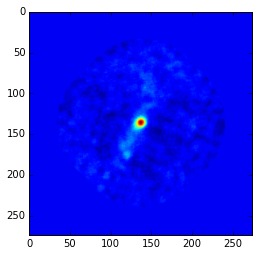

In [80]:
plt.imshow(data2)

In [81]:
np.floor(fig.world2pixel(266.5, -29))

AttributeError: 'Figure' object has no attribute 'world2pixel'

In [2]:
w.wcs_pix2world(100,100)

NameError: name 'w' is not defined

In [ ]:
w.printwcs()

In [ ]:
np.mgrid?

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
INFO:astropy:Auto-setting vmin to -1.202e+02
INFO:astropy:Auto-setting vmax to  6.234e+02
/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.
/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


INFO: Auto-setting vmin to -1.202e+02 [aplpy.core]
INFO: Auto-setting vmax to  6.234e+02 [aplpy.core]


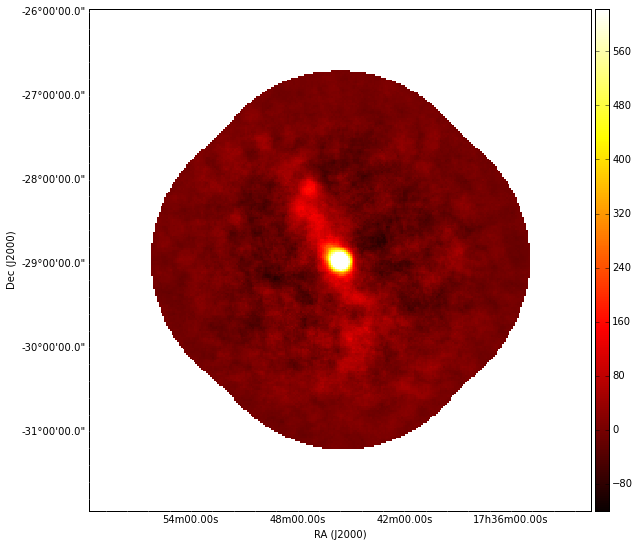

In [104]:
figure_SgrA_excess = aplpy.FITSFigure(hdu_2)
figure_SgrA_excess.show_colorscale(cmap='hot')
figure_SgrA_excess.show_colorbar()
#aplpy.FITSFigure?
HDUlist.close()

In [8]:
skymap_data, skymap_header = fits.getdata("./simpleFITStestRalph.fits", header = True)

excess_data_N = np.nan_to_num(skymap_data)

# Sgr A* middle bins
print(excess_data_N[119:123,119:122])

print(skymap_header)
# G0.9+0.1
print(skymap_data[148:151,159:161])

[[ 0.69483322  1.36599612  0.83247882]
 [ 0.80319762  1.44784331  1.15611184]
 [ 1.80984199  1.71381021  1.23525143]
 [ 1.75530291  1.21368682  1.31682861]]
XTENSION= 'IMAGE   '           / IMAGE extension                                BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                  319 / length of data axis 1                          NAXIS2  =                  319 / length of data axis 2                          PCOUNT  =                    0 / required keyword; must = 0                     GCOUNT  =                    1 / required keyword; must = 1                     EXTNAME = 'SignificanceSkyMap' / Extension name                                 RADECSYS= 'FK5     '           / WCS for this file                              EQUINOX =                2000. / Epoch of coordinate system                     CTYPE1  = 'RA---TAN'           / Axis type 

In [18]:
aplpy.FITSFigure.show_regions?


In [8]:
aplpy.FITSFigure.show_colorscale?

INFO:astropy:Auto-setting vmin to -4.360e+00
INFO:astropy:Auto-setting vmax to  7.348e+00
/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.
/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
        Use the `.cards` attribute instead. [pyregion.wcs_helper]
        Use the `.cards` attribute instead.
        Use the `.cards` attribute instead. [pyregion.wcs_helper]
        Use the `.cards` attribute instead.


INFO: Auto-setting vmin to -4.360e+00 [aplpy.core]
INFO: Auto-setting vmax to  7.348e+00 [aplpy.core]


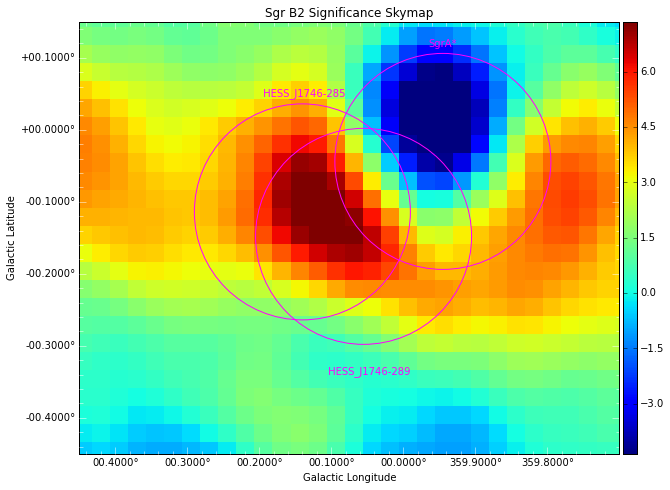

In [52]:
sig_filename_fits = "stage6_wobble_disp5t_skymap_subtraction_center_SgrA_maps.fits"
fig_apl = aplpy.FITSFigure(sig_filename_fits)
fig_apl.set_title("Sgr B2 Significance Skymap")
fig_apl.show_colorscale(smooth=1)
cbar = fig_apl.show_colorbar()
fig_apl.show_regions("stage6_wobble_disp5t_skymap_subtraction_center_SgrA_maps_ds9_full.reg")

fig_apl.recenter(0.075, -0.15, width=0.75, height=0.6) # 1746
#fig_apl.recenter(-0.25, -0.25, width=3.5, height=1.5) # center
#fig_apl.recenter(0.7, -0.05, width=0.5, height=0.5) # B2


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
INFO:astropy:Auto-setting vmin to -6.690e+00
/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.
/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
        Use the `.cards` attribute instead. [pyregion.wcs_helper]
        Use the `.cards` attribute instead.
        Use the `.cards` attribute instead. [pyregion.wcs_helper]
        Use the `.cards` attribute instead.


INFO: Auto-setting vmin to -6.690e+00 [aplpy.core]


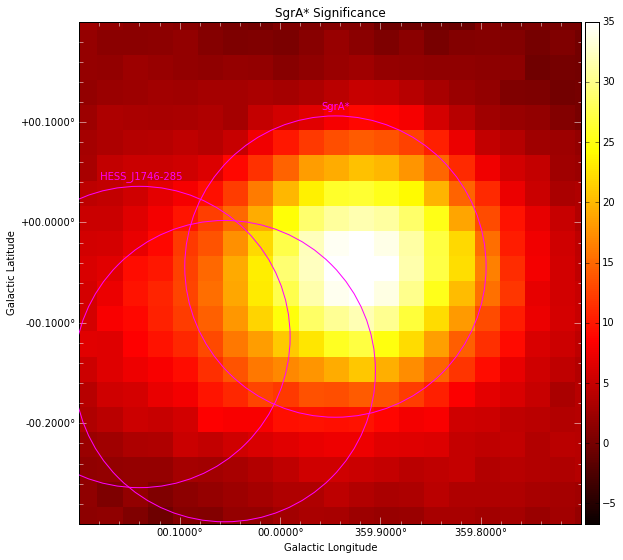

In [46]:
sig_filename_fits = "./SgrA_disp5t_excludeMore_skymap_4tels_s6.fits"
fig_apl = aplpy.FITSFigure(sig_filename_fits)
fig_apl.show_colorscale(cmap='hot', vmax=35.)
fig_apl.show_colorbar()
fig_apl.recenter(359.95, -0.05, width=0.5, height=0.5)
fig_apl.set_title("SgrA* Significance")

fig_apl.show_regions("stage6_wobble_disp5t_skymap_subtraction_center_SgrA_maps_ds9_full.reg")


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
INFO:astropy:Auto-setting vmin to -4.190e+00
/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.
/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


INFO: Auto-setting vmin to -4.190e+00 [aplpy.core]


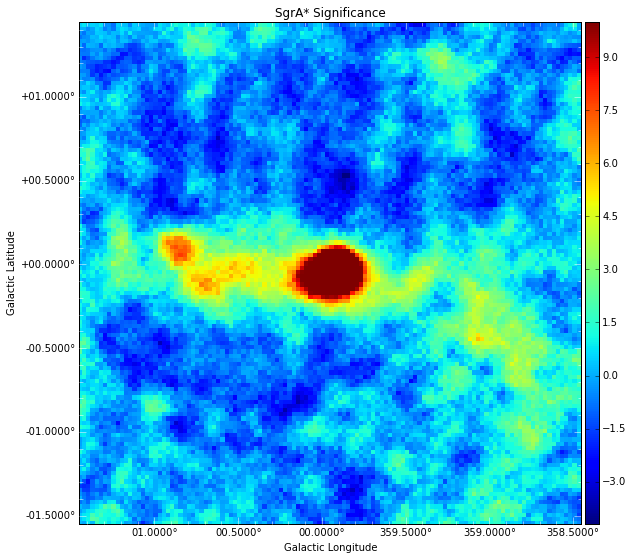

In [36]:
sig_filename_fits = "./SgrA_disp5t_excludeMore_skymap_4tels_s6.fits"
fig_apl = aplpy.FITSFigure(sig_filename_fits)
fig_apl.show_colorscale(vmax=10)
fig_apl.show_colorbar()
fig_apl.recenter(359.95, -0.05, width=3., height=3.)
fig_apl.set_title("SgrA* Significance")
fig_apl.show_regions("stage6_wobble_disp5t_skymap_subtraction_center_SgrA_maps_ds9_full.reg")

#fig_apl.show_circles(100, 100, 25)
